# QA for batch mock analysis: raw outputs (one realisation)

This is a quality assessment notebook to make simple plots when analysing a batch of mocks. This notebook focuses on assessing the raw outputs from LyaCoLoRe/SaclayMocks, i.e. the transmission and master files.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import fitsio
import healpy as hp
import os

from lyacolore import utils

In [3]:
from batch_plot import *

In [4]:
# Point to realisation
raw_dir = '/global/cfs/projectdirs/desi/mocks/lya_forest/london/v9.0/v9.0.0/'
cat_file = 'master.fits'
rnd_cat_file = 'master_randoms.fits'
dla_cat_file = 'master_DLA.fits'
rnd_dla_cat_file = 'master_DLA_randoms.fits'

## QSO sample

In [5]:
with fitsio.FITS(os.path.join(raw_dir,cat_file)) as h:
    print('Master file contains:   {} QSOs'.format(len(h[1][:])))
with fitsio.FITS(os.path.join(raw_dir,rnd_cat_file)) as h:
    print('Randoms file contains: {} QSOs'.format(len(h[1][:])))
with fitsio.FITS(os.path.join(raw_dir,dla_cat_file)) as h:
    print('DLA master file contains:   {} DLAs'.format(len(h[1][:])))
with fitsio.FITS(os.path.join(raw_dir,rnd_dla_cat_file)) as h:
    print('DLA randoms file contains: {} DLAs'.format(len(h[1][:])))

Master file contains:   3618455 QSOs
Randoms file contains: 36184550 QSOs
DLA master file contains:   2213515 DLAs
DLA randoms file contains: 22135131 DLAs


$\langle z \rangle$ across the sky

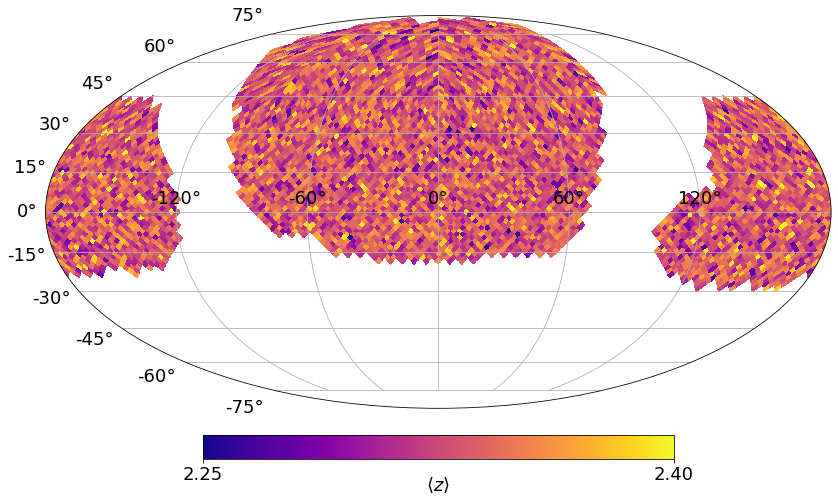

In [6]:
mean_quant_sky(os.path.join(raw_dir,cat_file),'master',nside=32,quant='z',vmin=2.25,vmax=2.4)

$\langle z \rangle$ across the sky (randoms)

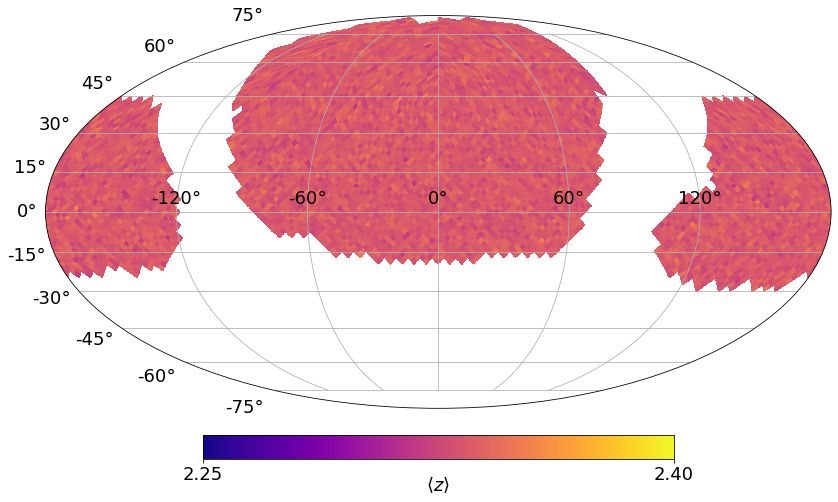

In [7]:
mean_quant_sky(os.path.join(raw_dir,rnd_cat_file),'master_randoms',nside=32,quant='z',vmin=2.25,vmax=2.4)

$n(z)$

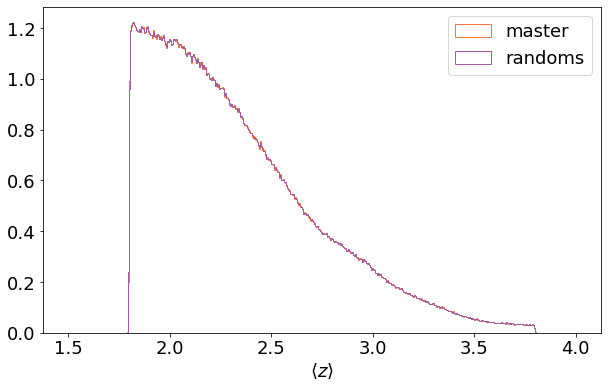

In [8]:
quant_hist([os.path.join(raw_dir,cat_file), os.path.join(raw_dir,rnd_cat_file)],
           ['master', 'master_randoms'],
           labels = ['master', 'randoms'],
           quant = 'z',
           density = True,
          )

$n(z)$ across the sky

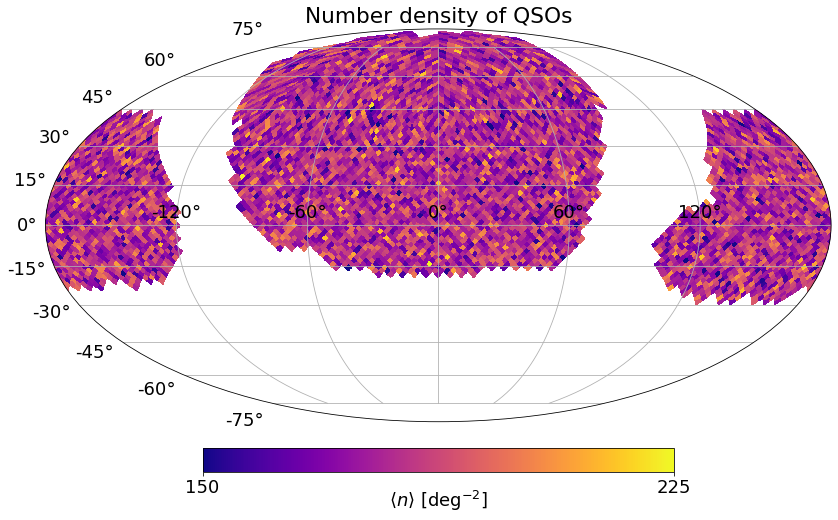

In [9]:
mean_quant_sky(os.path.join(raw_dir,cat_file),'master',nside=32,quant='ndens',vmin=150,vmax=225,title='Number density of QSOs')

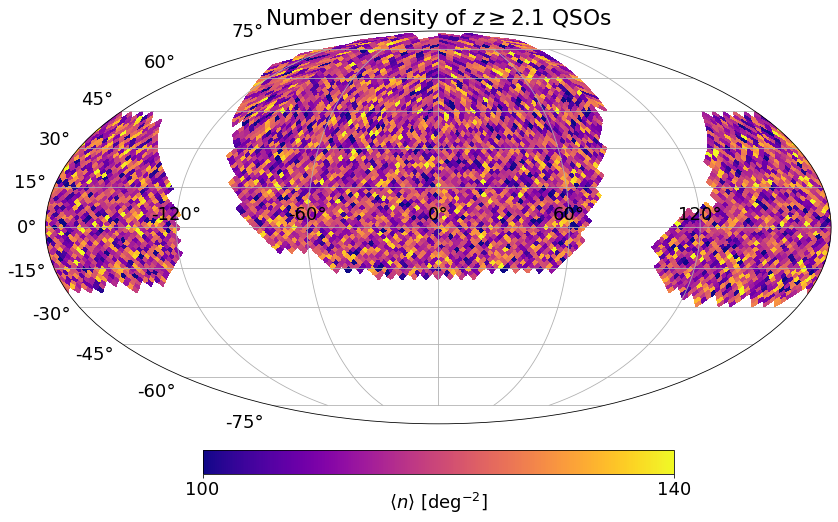

In [10]:
mean_quant_sky(os.path.join(raw_dir,cat_file),'master',nside=32,quant='ndens',vmin=100,vmax=140,zmin=2.1,title=r'Number density of $z\geq2.1$ QSOs')

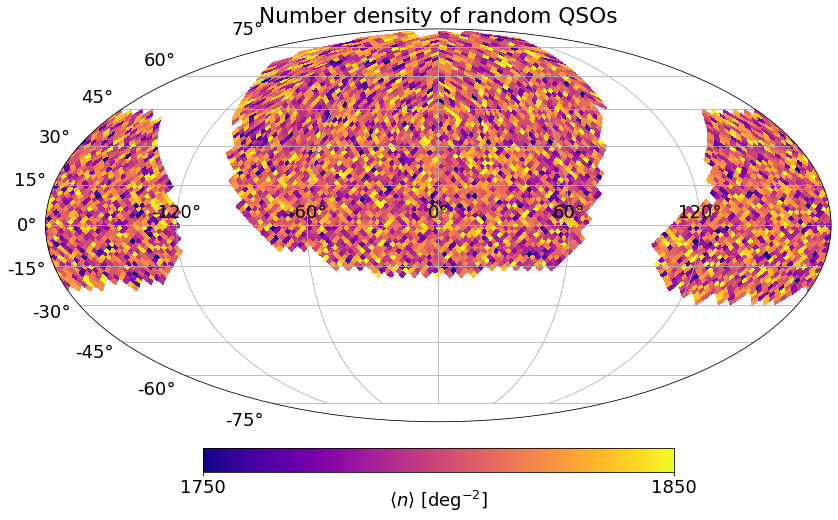

In [11]:
mean_quant_sky(os.path.join(raw_dir,rnd_cat_file),'master_randoms',nside=32,quant='ndens',vmin=1750,vmax=1850,title='Number density of random QSOs')

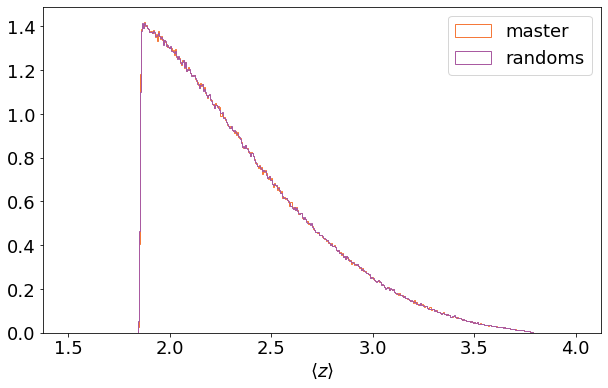

In [7]:
quant_hist([os.path.join(raw_dir,dla_cat_file), os.path.join(raw_dir,rnd_dla_cat_file)],
           ['master_dla', 'master_dla_randoms'],
           labels = ['master', 'randoms'],
           quant = 'z',
           density = True,
          )

In [9]:
hdla, hdla_rand = fitsio.FITS(os.path.join(raw_dir,dla_cat_file)), fitsio.FITS(os.path.join(raw_dir,rnd_dla_cat_file))

In [12]:
hdla[1]


  file: /global/cfs/projectdirs/desi/mocks/lya_forest/london/v9.0/v9.0.0/master_DLA.fits
  extension: 1
  type: BINARY_TBL
  extname: DLACAT
  rows: 2213515
  column info:
    RA                  f8  
    DEC                 f8  
    Z_QSO_NO_RSD        f8  
    Z_QSO_RSD           f8  
    Z_DLA_NO_RSD        f8  
    Z_DLA_RSD           f8  
    N_HI_DLA            f8  
    MOCKID              i8  
    DLAID               i8  
    PIXNUM              i8  

In [48]:
rand_ds = 0.1
wrand = np.random.uniform(size=len(hdla_rand[1][:]))<=rand_ds

In [49]:
len(hdla_rand[1][:])

22135131

In [50]:
wrand.sum()

2212398

In [51]:
len(hdla[1][:])

2213515

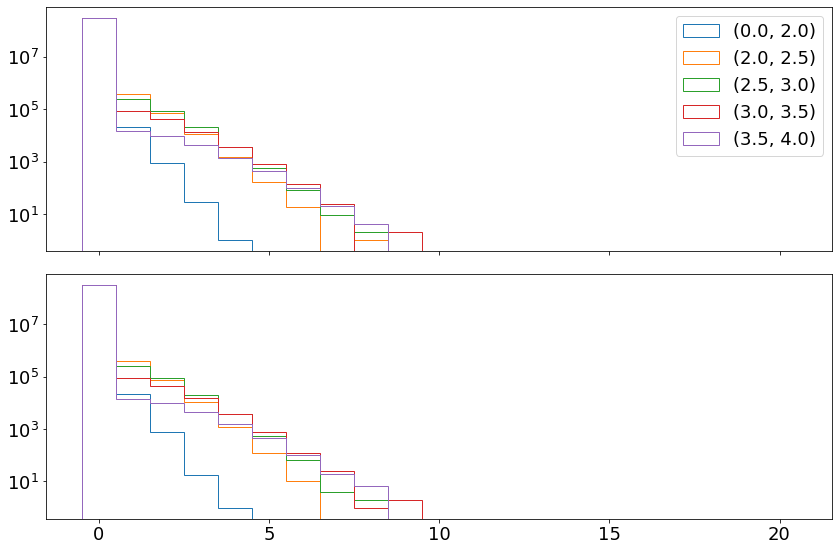

In [52]:
fig, axs = plt.subplots(2,1,figsize=(12,8),squeeze=False,sharex=True,sharey=True)

zbins = [(0.,2.),(2.,2.5),(2.5,3.),(3.,3.5),(3.5,4.)]
bins = np.linspace(-0.5,20.5,22)

lrmin = 1040.
lrmax = 1200.

lrdla = utils.lya_rest*(1+hdla[1][:]['Z_DLA_RSD'])/(1+hdla[1][:]['Z_QSO_RSD'])
w_lrdla = (lrdla>=lrmin) & (lrdla<lrmax)

lrdla_rand = utils.lya_rest*(1+hdla_rand[1][:]['Z_DLA'])/(1+hdla_rand[1][:]['Z_QSO_RSD'])
w_lrdla_rand = (lrdla_rand>=lrmin) & (lrdla_rand<lrmax)

for zbin in zbins:
    w = (hdla[1][:]['Z_QSO_RSD']>=zbin[0]) & (hdla[1][:]['Z_QSO_RSD']<zbin[1])
    ndla_perspec = np.bincount(hdla[1][:]['MOCKID'][w&w_lrdla])
    axs[0,0].hist(ndla_perspec,bins=bins,histtype='step',label=str(zbin))
    
    w = (hdla_rand[1][:]['Z_QSO_RSD']>=zbin[0]) & (hdla_rand[1][:]['Z_QSO_RSD']<zbin[1])
    ndla_perspec = np.bincount(hdla_rand[1][:]['MOCKID'][w&w_lrdla_rand&wrand])
    axs[1,0].hist(ndla_perspec,bins=bins,histtype='step')

    axs[0,0].semilogy()
    axs[0,0].legend()

plt.tight_layout()

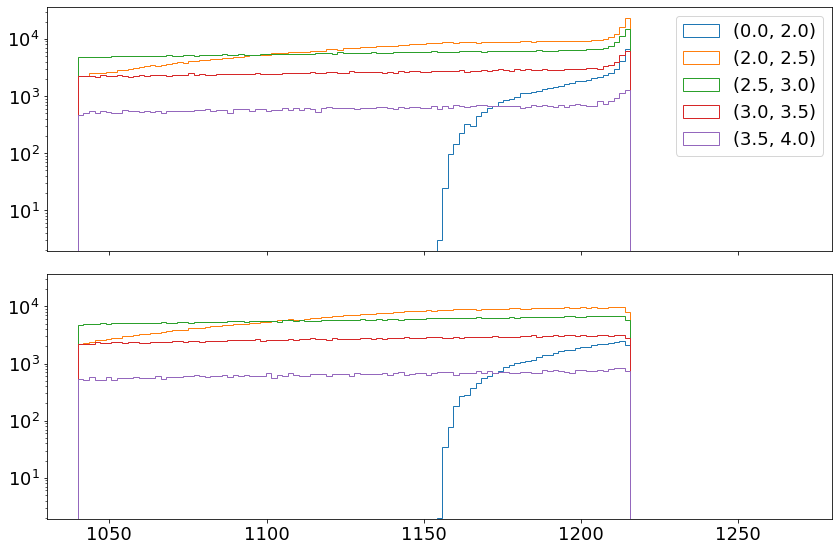

In [56]:
fig, axs = plt.subplots(2,1,figsize=(12,8),squeeze=False,sharex=True,sharey=True)

bins = np.linspace(1040.,1215.67,101)

lrdla = utils.lya_rest*(1+hdla[1][:]['Z_DLA_RSD'])/(1+hdla[1][:]['Z_QSO_RSD'])
lrdla_rand = utils.lya_rest*(1+hdla_rand[1][:]['Z_DLA'])/(1+hdla_rand[1][:]['Z_QSO_RSD'])

results = {}
results_rand = {}
for zbin in zbins:
        
    w = (hdla[1][:]['Z_QSO_RSD']>=zbin[0]) & (hdla[1][:]['Z_QSO_RSD']<zbin[1])
    results[zbin] = axs[0,0].hist(lrdla[w],bins=bins,histtype='step',label=str(zbin))

    w = (hdla_rand[1][:]['Z_QSO_RSD']>=zbin[0]) & (hdla_rand[1][:]['Z_QSO_RSD']<zbin[1])
    results_rand[zbin] = axs[1,0].hist(lrdla_rand[w&wrand],bins=bins,histtype='step')

axs[0,0].semilogy()
axs[0,0].legend(loc=1)

axs[0,0].set_xlim(1030.,1280.)
plt.tight_layout()

In [59]:
results[zbins[0]][0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
       2.500e+01, 9.500e+01, 1.420e+02, 2.210e+02, 3.230e+02, 3.040e+02,
       4.390e+02, 5.170e+02, 6.280e+02, 6.600e+02, 7.770e+02, 8.360e+02,
       8.810e+02, 9.480e+02, 1.116e+03, 1.110e+03, 

/global/u1/j/jfarr/.conda/envs/lyacolore/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


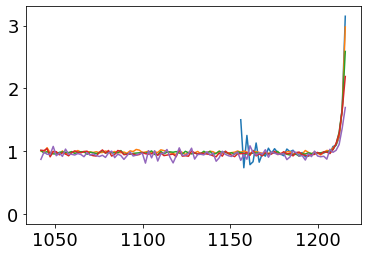

In [60]:
for zbin in zbins:
    plt.plot(bins[1:],results[zbin][0]/results_rand[zbin][0])

In [74]:
correlations = {'lyalya_lyalya':    {'type': 'cf'}}

In [75]:
correlations['lyalya_lyalya']['q1'], correlations['lyalya_lyalya']['q2'] ='lyalya_lyalya'.split('_')

In [76]:
correlations

{'lyalya_lyalya': {'type': 'cf', 'q1': 'lyalya', 'q2': 'lyalya'}}

In [77]:
for k,c in correlations.items():
    print(k)
    print(c)

lyalya_lyalya
{'type': 'cf', 'q1': 'lyalya', 'q2': 'lyalya'}


In [78]:
correlations

{'lyalya_lyalya': {'type': 'cf', 'q1': 'lyalya', 'q2': 'lyalya'}}

In [79]:
x = correlations['lyalya_lyalya']

In [80]:
x

{'type': 'cf', 'q1': 'lyalya', 'q2': 'lyalya'}

In [81]:
x.pop(['q1','q2'])

TypeError: unhashable type: 'list'

In [73]:
x

{'type': 'cf', 'q2': 'lyalya'}

## Example skewers

Example skewer

In [233]:
pixnum = 0
skwnums = [0,1,2]

In [231]:
def show_example_skewer(raw_dir,pixnum,skwnums,nside=16,lmin=None,lmax=None,lya_only=True):
    
    dirname = utils.get_dir_name(raw_dir,pixnum)
    fname = utils.get_out_file_name(dirname,'transmission',nside,pixnum)
    
    h = fitsio.FITS(fname)
    
    nskw = len(skwnums)
    fig, axs = plt.subplots(nskw,1,figsize=(10,4*nskw),squeeze=False,sharex=True)
    
    for i,skwnum in enumerate(skwnums):
        
        if lya_only:
            axs[i,0].plot(h['WAVELENGTH'][:],h['F_LYA'][:,:][skwnum,:],c=mycolours['C0'],label=r'$F_{\mathrm{Ly}\alpha}$')
        else:
            F = h['F_LYA'][:,:][skwnum,:] * h['F_LYB'][:,:][skwnum,:] * h['F_METALS'][:,:][skwnum,:]
            axs[i,0].plot(h['WAVELENGTH'][:],F,c=mycolours['C0'],label=r'$F_{\mathrm{total}}$',ls='--')
            axs[i,0].plot(h['WAVELENGTH'][:],h['F_LYA'][:,:][skwnum,:],c=mycolours['C1'],label=r'$F_{\mathrm{Ly}\alpha}$',zorder=-1)
            axs[i,0].plot(h['WAVELENGTH'][:],h['F_LYB'][:,:][skwnum,:],c=mycolours['C2'],label=r'$F_{\mathrm{Ly}\beta}$',zorder=-1)
            axs[i,0].plot(h['WAVELENGTH'][:],h['F_METALS'][:,:][skwnum,:],c=mycolours['C3'],label=r'$F_{\mathrm{metals}}$',zorder=-1)
        
        text = r'$\mathrm{{MOCKID}}={:1d}$'.format(h[1][:]['MOCKID'][skwnum])
        text += '\n'+r'$\mathrm{{RA}}={:1.3f}$'.format(h[1][:]['RA'][skwnum])
        text += '\n'+r'$\mathrm{{DEC}}={:1.3f}$'.format(h[1][:]['DEC'][skwnum])
        text += '\n'+r'$z_\mathrm{{QSO}}={:1.3f}$'.format(h[1][:]['Z'][skwnum])
        axs[i,0].text(0.98,0.02,text,transform=axs[i,0].transAxes,ha='right',va='bottom')
        
        axs[i,0].axhline(y=0.,color='lightgrey',ls='--',zorder=-10)
        axs[i,0].axhline(y=1.,color='lightgrey',ls='--',zorder=-10)
        
        axs[i,0].legend(loc=3)
        axs[i,0].set_ylabel(r'$F(\lambda)$')
        
    axs[-1,0].set_xlabel(r'$\lambda~[\AA]$')
    
    axs[0,0].set_xlim(lmin,lmax)
    
    plt.tight_layout()
    
    return

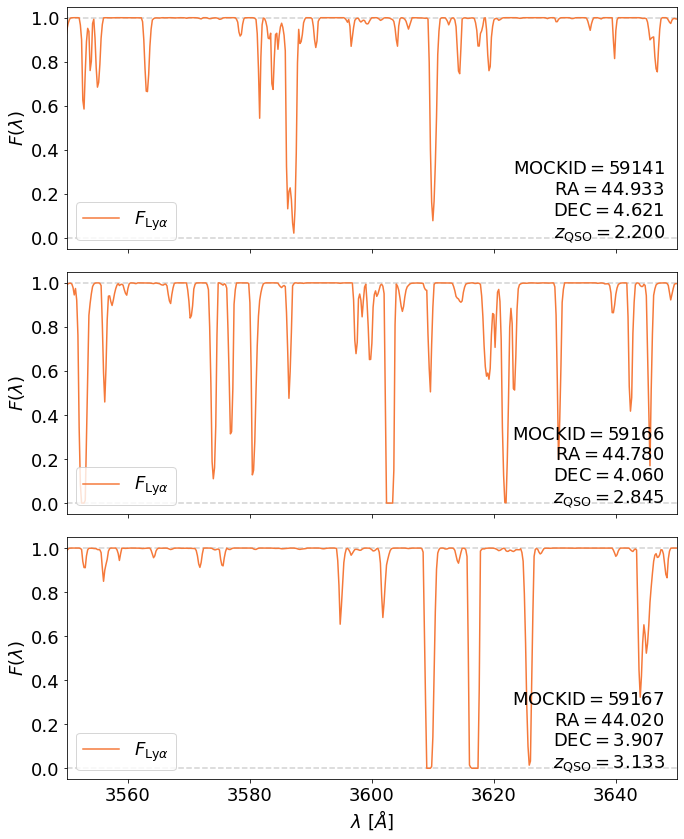

In [234]:
show_example_skewer(raw_dir,pixnum,skwnums,lmin=3550.,lmax=3650.,lya_only=True)

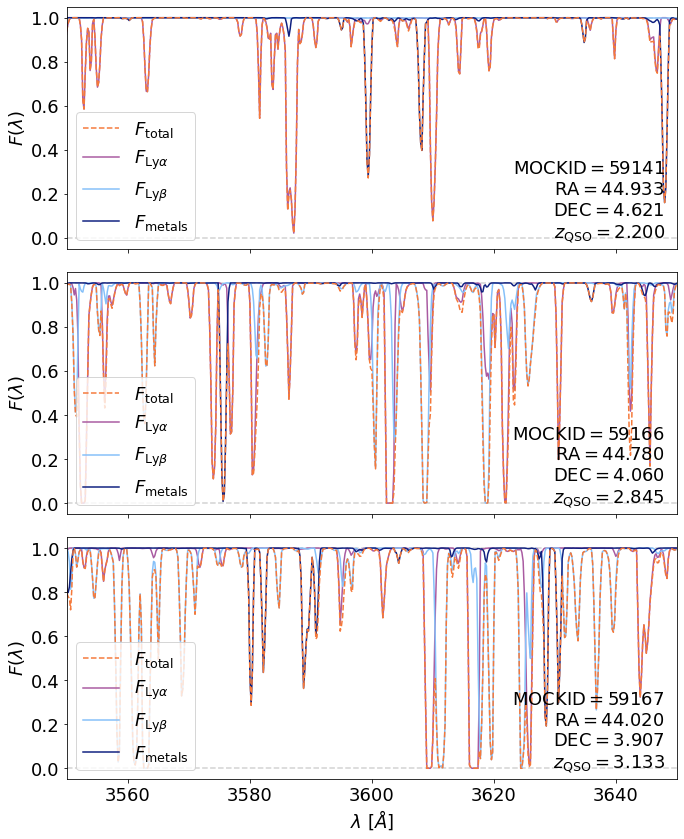

In [235]:
show_example_skewer(raw_dir,pixnum,skwnums,lmin=3550.,lmax=3650.,lya_only=False)

## Properties of the flux field

$\bar{F}(\lambda_r)$

$\bar{F}(z; \lambda_r)$

## Distribution of DLAs

$f(N_{HI},z)$